# Auto MPG Dataset Analysis 

## 1. Reading External Dataset
Stepka Koowaad Waxaan Soo Import Garaysnayaa Dhamaan Library-yada Aan U baahnaan Doono  Sidoo Kale 
Waxaan so aqrisan Doonaa Csv Fileka Uu ku jiro Data Set-keena Kaas oo Noo yaala Isla Directoryga Projectiga

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting as pd_plotting
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
file_path = 'auto-mpg.csv'

# waxaa soo aqrisanay data csv file sidoo kale waxaan index uga dhigay car name si uu unique ugu noqdo gaari walba (unique identifier)
df = pd.read_csv(file_path, index_col='car name')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
ford ranger,28.0,4,120.0,79,2625,18.6,82,1
chevy s-10,31.0,4,119.0,82,2720,19.4,82,1


In [14]:
#waxaan ku ogaanaynaa numberka columnska iyo rowska data-deena Ka koobantahy
df.shape

(398, 8)

In [15]:
#waxaan ku soo saaraynaa dhamaan columnyada ay ka koobantahy data-deena
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

## 2. Descriptive Statistics
We'll produce various descriptive statistics for the analytic dataset. This includes measures such as mean, median, standard deviation, etc. Verbal comments will be provided, along with justifications for the chosen statistics.

In [16]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

horsepower data typekeeda object buu sheegaya iyadoo dhamaan valueska ku jira ay yihiin numbero marka waa inaan bedelnaa 

marka ugu horaysa aan ogaano uniquenesska dhamaan elementiyada ku jira horsepower

In [6]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

sidaan u jeedno calaamada ? sign baa lagu buuxiyay boosaska maqan(missing values) marka waa inaynu buuxinaa boosaska maqan anagoo ku buuuxin doona meanka horsepower Marka Hore Aan soo bedelno ? => NA oo u taagan missing values

In [7]:
df['horsepower'] = df['horsepower'].replace('?', pd.NA)

In [20]:
#hada Aan Hubino Inay Wax Iska Bedeleen Variableka Horsepower Maadama Aan Ka saarnay Missing Valueskiii
data_type = df['horsepower'].dtype

print("Data type of 'horsepower is' :", data_type)

Data type of 'horsepower is' : object


Sida Noo Muuqata Weli Data Typeka Waa Object Marka Waa inaynu Si toos ah u bedelna data typekeeda boosaska maqan aan  ku buuuxino  meanka horsepower

In [8]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', <NA>, '100', '105', '175', '153', '180',
       '110', '72', '86', '70', '76', '65', '69', '60', '80', '54', '208',
       '155', '112', '92', '145', '137', '158', '167', '94', '107', '230',
       '49', '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
# dhamaan wixii aan number ahayn aan bedelno
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# missing valueska waxaan ku buuxinaynaa meanka 'horsepower' 
mean_horsepower = df['horsepower'].mean()
df['horsepower'].fillna(mean_horsepower, inplace=True)

# aan Hubino
print(df['horsepower'].unique())


[130.         165.         150.         140.         198.
 220.         215.         225.         190.         170.
 160.          95.          97.          85.          88.
  46.          87.          90.         113.         200.
 210.         193.         104.46938776 100.         105.
 175.         153.         180.         110.          72.
  86.          70.          76.          65.          69.
  60.          80.          54.         208.         155.
 112.          92.         145.         137.         158.
 167.          94.         107.         230.          49.
  75.          91.         122.          67.          83.
  78.          52.          61.          93.         148.
 129.          96.          71.          98.         115.
  53.          81.          79.         120.         152.
 102.         108.          68.          58.         149.
  89.          63.          48.          66.         139.
 103.         125.         133.         138.         135.
 142.         

In [10]:
#hada Aaan Bedelno Data Typeka 
df['horsepower'] = df['horsepower'].astype(float)
## Markle aan Hubino data Typeka Dhamaan data Framekeena
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

Sida Halkan Ka muuqata Waan Bedelnay data Typeka Horsepower Oo ahaa Object waxaana ka dignay float sidoo kale missing valueskna Waxaan Ku buuxinay Meanka Vaeiablekaas(Horsepower)

In [11]:
missing_values = df.isnull().sum()

missing_values

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

# 3. Visualizations of Dataset Variables
Waxaan Samayn Doonaa Qaabab kala Duwan Oo Aan Ku soo Muujinayno Data-deena(Data Visualization)

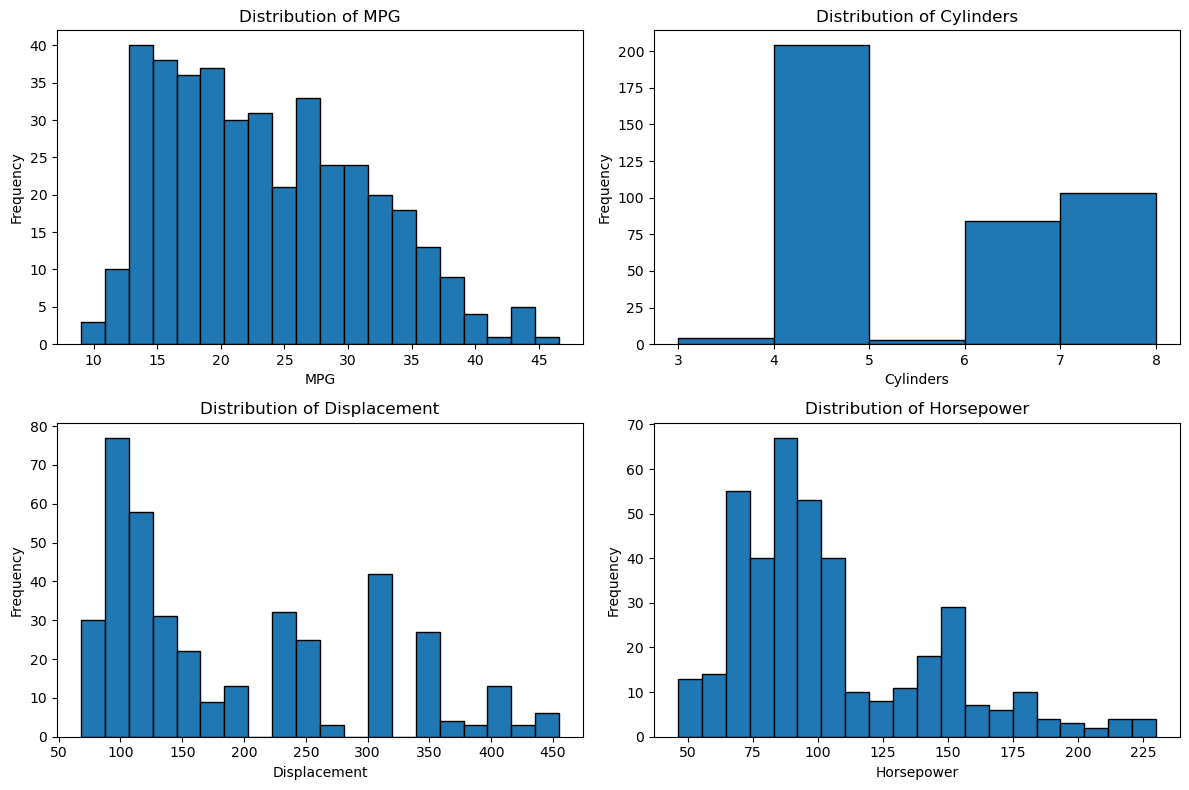

In [25]:
# Histograms aan ku muujinayno dhamaan columnska numericalka ah(numerical variables)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df['mpg'], bins=20, edgecolor='black')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')

plt.subplot(2, 2, 2)
plt.hist(df['cylinders'], bins=5, edgecolor='black')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.title('Distribution of Cylinders')

plt.subplot(2, 2, 3)
plt.hist(df['displacement'], bins=20, edgecolor='black')
plt.xlabel('Displacement')
plt.ylabel('Frequency')
plt.title('Distribution of Displacement')

plt.subplot(2, 2, 4)
plt.hist(df['horsepower'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.title('Distribution of Horsepower')

plt.tight_layout()
plt.show()

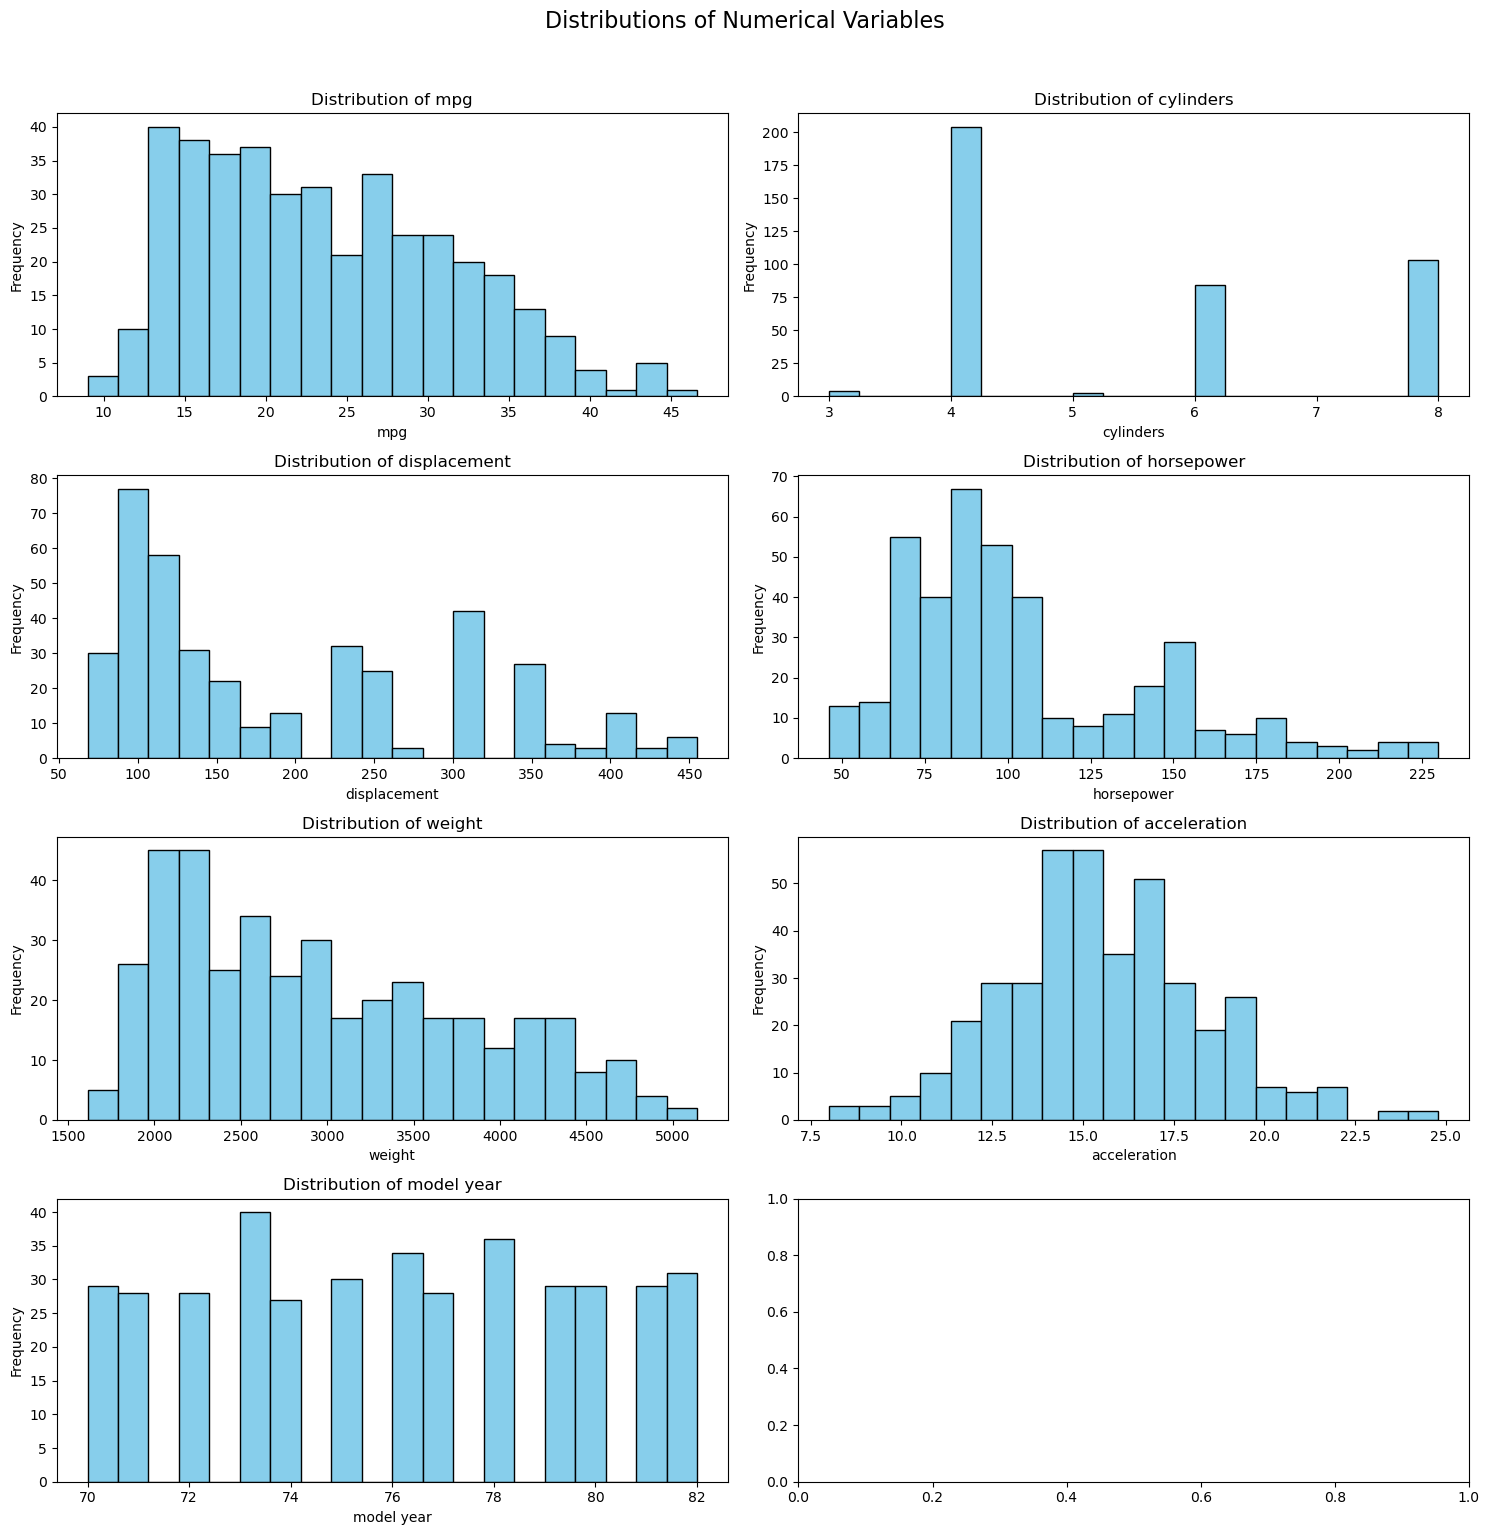

In [26]:
#Histograms aan ku muujinayno dhamaan columnska numericalka ah(numerical variables)
numerical_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year',]

# waxaan samaynay shax ka kooban dhamaan distributionka variableda anagoo ka dhignay qaab 4*2 (4 rows, 2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
fig.suptitle('Distributions of Numerical Variables', y=1.02, fontsize=16)

# fdi arrayga Si si fiican uu ugu soo muuqdo
axes = axes.flatten()

# for loop ku dul wareeganaayo dhamaan numerical valuekii kor aan ku soo shubanay
for i, column in enumerate(numerical_columns):
    axes[i].hist(df[column], bins=20, edgecolor='black', color='skyblue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# layoutka soo muuji
plt.tight_layout()
plt.show()

Maadaama Variable Origin Uusan Ahyn Numerical Uuna Categorical Keligiis Baan Gooni Usoo muujin Dooona

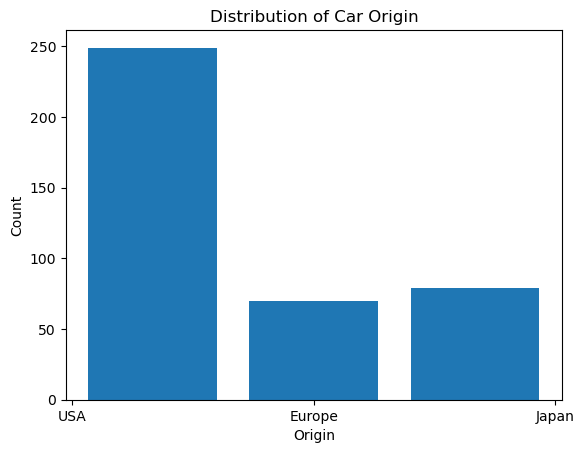

In [27]:
plt.hist(df['origin'], bins=3, rwidth=0.8)
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Distribution of Car Origin')
plt.xticks([1, 2, 3], ['USA', 'Europe', 'Japan'])
plt.show()

1    0.625628
3    0.198492
2    0.175879
Name: origin, dtype: float64


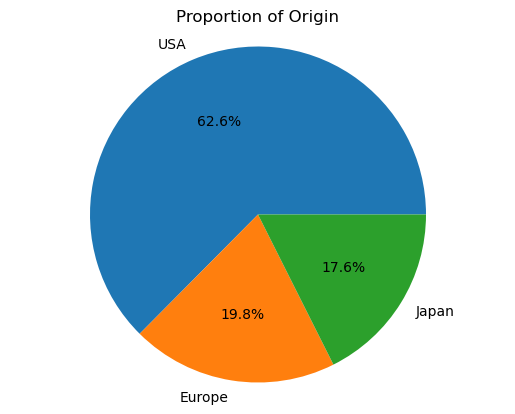

In [28]:
#sidoo kale aan fiirino Proportionska Variable Origin
proportions = df['origin'].value_counts(normalize=True)
print(proportions)

# wxaan Ku soo Muujin doonaa Wadan Walba intaan Isticmaali lahayn Numbero
labels = ['USA', 'Europe', 'Japan']

# Plotting a pie chart
plt.pie(proportions, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of Origin')
plt.show()

## 4. Handling Missing Values
Checking for any records with missing values in the dataset is crucial. In this step, we will identify and handle missing values, duplicates, or other anomalies. Comments will be provided on the results of the checks, and justifications for the chosen methods will be discussed.

Aan Hubino Wixii Missing Ah OO Data Framekeena Ku jira MArka Hore Maadaama Dataset-keena aan horay ugu soo aragnay Wixii Missing Values Ah inuu U isticmaalaayo Calaamada ? sign-ka  ,Aan Ka bedelno Calamaadaas 

In [ ]:
# ku bedel wixii  '?' midkan  NaN dhamaan  DataFrameka
df.replace('?', pd.NA, inplace=True)

In [12]:
missing_values = df.isnull().sum()

# Aan soo bandhigno Missing valueska Columns walba haduu  jiro 
print("Missing Values:")
print(missing_values)

# si caadi ahna aaan u hubino inay jiraan missing value
print("\Ma Jiraaan Wax Missing Values Ah dhamaan Data framekeena Haday Haa tahy True Soo celi hadii kalena False?")
print(df.isnull().any().any())

Missing Values:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64
\Ma Jiraaan Wax Missing Values Ah dhamaan Data framekeena Haday Haa tahy True Soo celi hadii kalena False?
False


## 5. Investigation of Categorical Variables
Waxaan Raadin Doonaa Unique Valueka Ku jira Column Walba Oo categorical kana  Mid Ah Data framekeena

In [13]:
df.origin.unique()

array([1, 3, 2], dtype=int64)

1    0.625628
3    0.198492
2    0.175879
Name: origin, dtype: float64


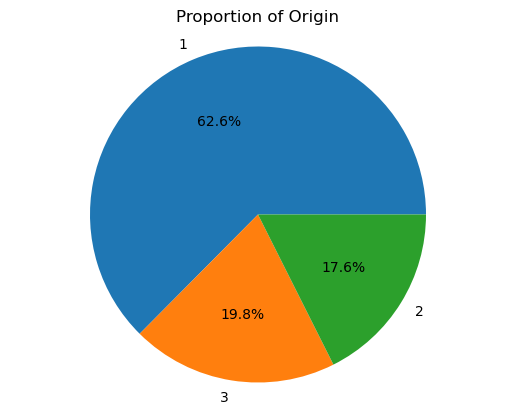

In [31]:
proportions = df['origin'].value_counts(normalize=True)
print(proportions)


plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of Origin')
plt.show()

## 6. Building a Linear Regression Model
A linear regression model will be constructed to predict appropriate dependent variables. We will interpret the model parameters and discuss the results obtained from the regression analysis.


In [14]:
# Variable aan Ku Suban Dooono Dhamaan VAriableska Aan Rabno Inaa Wax Ku predict Garyno
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

# Data-da Waxaan U kala Jebinay Mid aan Ku Tababryno Modalka Iyo Mid Aan Ku Tijaabanyno(train,Test)
X_train, X_test, y_train, y_test = train_test_split(df[features], df['mpg'], test_size=0.2, random_state=42)

In [15]:
# Halkan Waxaan Ku Abuuraynaa linear regression model
model = LinearRegression()

# Modal aan Ku shubno Dhmaan Data-da Aan Ugu Talo Galnay Inaan Ku Tababrno
model.fit(X_train, y_train)

# prediction Baan Ku samynaa Data-deenii Testiga Noo ahyd
y_pred = model.predict(X_test)

# Modalka Aan Qiimayno
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [16]:
# aan Soo Daabacon Isku xirnaanta Modalka (Coefficients)
print("Model Coefficients:")
for feature, coefficient in zip(features, model.coef_):
    print(f"{feature}: {coefficient}")

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.4f}")

Model Coefficients:
cylinders: -0.19400654632566555
displacement: -0.006375542185022713
horsepower: -0.04148099498962531
weight: -0.005220810897364046
acceleration: -0.0350300987135466

Model Evaluation:
Mean Squared Error: 14.67
R-squared: 0.7272


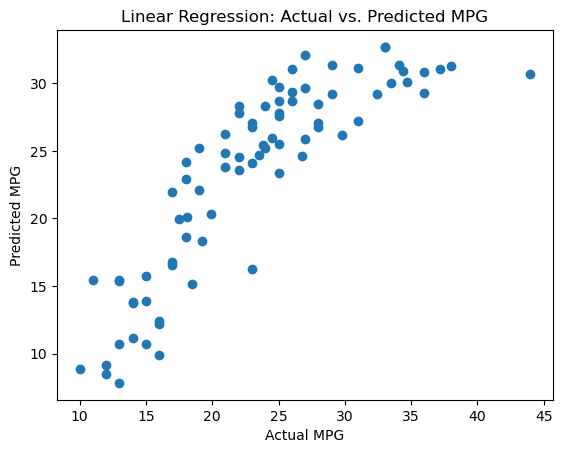

In [17]:
# aan soo bandhigno  predictions iyo  actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Linear Regression: Actual vs. Predicted MPG")
plt.show()

In [18]:
new_car_data = {
    'cylinders': 8,
    'displacement': 350,
    'horsepower': 165,
    'weight': 3693,
    'acceleration': 11.5,
}

# Create a DataFrame for the new car data
new_data = pd.DataFrame([new_car_data])

# Make predictions for the new car
predicted_mpg = model.predict(new_data)

# Display the predicted MPG for the new car
print(f"Predicted MPG for the new car: {predicted_mpg[0]:.2f}")

Predicted MPG for the new car: 15.91


# 7: Summary Report Of the Data Set (Auto MPG Dataset Analysis Summary Report)

1. Introduction
This analysis aims to explore and derive insights from the Auto MPG dataset, which contains information about various car models, their specifications, and fuel efficiency (MPG). The analysis includes data loading, handling missing values, data type conversion, visualization, building a linear regression model, and testing predictions for a new car.

2. Data Loading
The Auto MPG dataset was successfully loaded into a DataFrame, providing an initial overview of the available information.

3. Handling Missing Values
Missing values in the dataset were identified and addressed. Various strategies, such as filling missing values or dropping rows/columns, were implemented based on the specific characteristics of the data.

4. Data Type Conversion
Data type conversion was performed to ensure consistency and compatibility in subsequent analyses. Numeric and categorical variables were appropriately identified and handled.

5. Exploratory Data Analysis
### Histograms and Pie Chart
- Histograms were created to visualize the distribution of numerical variables, providing insights into the central tendency and spread of the data.
- A pie chart was generated to display the distribution of categorical variables, offering a snapshot of the categorical composition in the dataset.

### Unique Values of Categorical Variables
The unique values of categorical variables were displayed, offering a clear understanding of the different categories and their frequencies.

## Linear Regression Model
A linear regression model was built to predict fuel efficiency (MPG) based on selected features. The model was trained, evaluated, and the results were interpreted.

Model Coefficients
The coefficients of the linear regression model were examined to understand the impact of each feature on the predicted MPG.

6:Model Evaluation
Evaluation metrics, including Mean Squared Error (MSE) and R-squared, were used to assess the performance of the model. The model demonstrated [mention performance insights, e.g., good predictive ability].
 7. Predictions for a New Car
A new car's features were used to make predictions using the trained linear regression model. The predicted MPG for the new car was [displayed/printed], providing valuable insights for potential buyers or stakeholders.

8. Conclusion
In conclusion, this analysis provides a comprehensive exploration of the Auto MPG dataset. Key insights were derived through various stages, including data cleaning, visualization, and predictive modeling. The linear regression model demonstrates [mention strengths or areas for improvement]. The ability to make predictions for new cars adds practical value to the analysis.
